In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import sys

pd.set_option('display.max_columns',500)
pd.set_option('display.max_columns',500)

font_path='C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path,size=10).get_name()
plt.rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
df1 = pd.read_excel('공정보고_요청_데이터.xlsx',sheet_name='공정보고_공정률(주간,월간)')
df2 = pd.read_excel('공정보고_요청_데이터.xlsx',sheet_name='현장마일스톤(기초데이터)')

In [6]:
df1 = df1[df1['사업부']=='주택']

In [8]:
df1 = df1[~df1['현장명'].isin(['인천영종힐스테이트','해운대 힐스테이트 위브','이수힐스테이트','창원 감계 힐스테이트 1차','창원 감계 힐스테이트 3차',
                                      '인천검단힐스테이트5차','힐스테이트 구성','퇴계원 힐스테이트','힐스테이트 신촌','인천 검단 힐스테이트 6차',
                                      '독산동 현대지식산업센터','강서 힐스테이트'])]

In [11]:
df = df1[df1['보고타입']=='W']
df = df[df['사업부']=='주택']
df['보고기준일'] = pd.to_datetime(df['보고기준일'])
df['공정기준일'] = pd.to_datetime(df['공정기준일'])

In [12]:
list_notdone = df[df['보고기준일']>pd.to_datetime('2019-12-30')]['현장코드'].unique().tolist()
df = df[~df['현장코드'].isin(list_notdone)]

In [15]:
tmp = df['현장코드'].value_counts()
df = df[df['현장코드'].isin(tmp[tmp>50].index.tolist())]

In [18]:
df.sort_values(by=['현장명','보고기준일'], ascending=True, inplace=True)
df.reset_index(inplace=True, drop=True)

In [20]:
def make_pct(df,x):
    tmp = df[df['현장코드']==x]
    tmp[tmp['현장코드']==i].sort_values(by='공정기준일', inplace=True)
    a = np.arange(tmp.shape[0]).tolist()
    y = [x/(tmp.shape[0]-1) for x in a]
    return y

In [21]:
for i in df['현장코드'].unique():
    df.loc[df['현장코드']==i,'pct'] = make_pct(df,i)

In [23]:
df['현장코드'].unique()[0]

'GE31'

In [33]:
df2 = df2[df2['삭제여부']!='Y']

In [34]:
df_milestone = pd.DataFrame([])
for i in df['현장코드'].unique():
    tmp = df2[df2['현장코드']==i]
    tmp.sort_values(by='계획일', ascending=True, inplace=True)
    a = np.arange(tmp.shape[0]).tolist()
    a = [x/(tmp.shape[0]-1) for x in a]
    tmp['pct'] = a
    df_milestone = pd.concat([df_milestone, tmp])
df_milestone.reset_index(drop=True, inplace=True)

In [36]:
df5 = pd.read_excel('공정보고_요청_데이터_주택.xlsx',sheet_name='현장마일스톤지연및만회대책보고')

In [39]:
df5 = df5[df5['보고타입']=='W']
df5 = df5[['현장코드','마일스톤고유번호']].drop_duplicates(keep='first')
df5.reset_index(inplace=True, drop=True)

In [41]:
df5['지연여부'] = 1

In [45]:
df_milestone.rename(columns={'고유번호':'마일스톤고유번호'}, inplace=True)

In [47]:
df_milestone = df_milestone.merge(df5, on=['현장코드','마일스톤고유번호'], how='left')

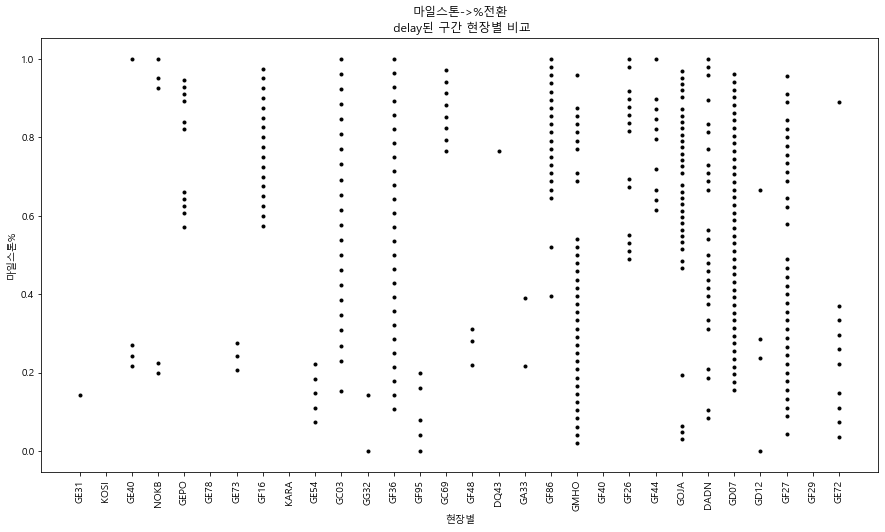

In [63]:
fig = plt.figure(figsize=(15,8))
for i,v in enumerate(df_milestone['현장코드'].unique()):
    tmp = df_milestone[df_milestone['현장코드']==v]
    tmp = tmp[~tmp['지연여부'].isnull()]
    plt.scatter(x=[i]*len(tmp), y=tmp['pct'], marker='.', color='black')
plt.xticks(np.arange(len(df_milestone['현장코드'].unique())), df_milestone['현장코드'].unique(), rotation=90)
plt.xlabel('현장별')
plt.ylabel('마일스톤%')
plt.title('마일스톤->%전환\n delay된 구간 현장별 비교')
plt.show()

In [120]:
len(df_milestone['현장코드'].unique())

30

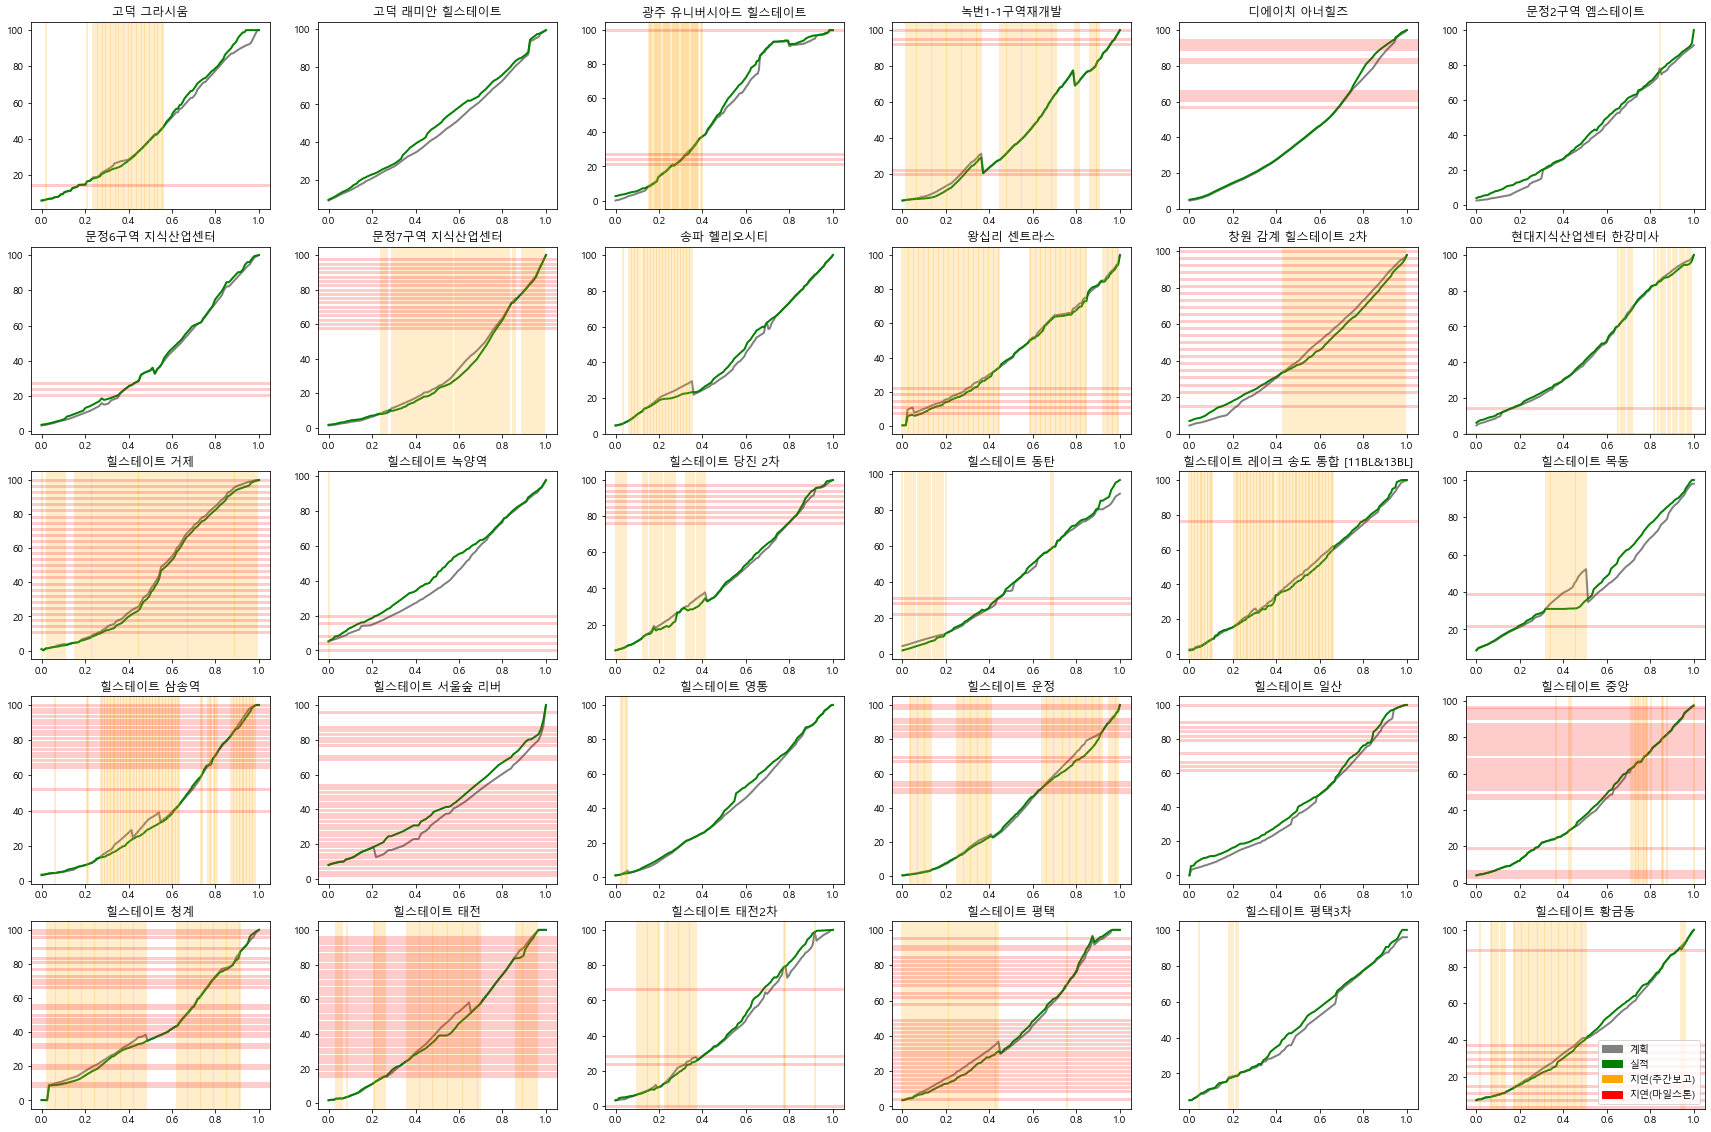

In [126]:

#for i,v in enumerate(df_milestone['현장코드'].unique()[0]):

fig, ax = plt.subplots(figsize=(30,20))

for i,v in enumerate(df_milestone['현장코드'].unique()):


    plt.subplot(5,6,i+1)
    tmp = df[df['현장코드']==v]
    site_name = tmp['현장명'].unique()[0]
    plt.plot(tmp['pct'], tmp['계획'], color='grey', linewidth=2)
    plt.plot(tmp['pct'], tmp['실적'], color='green', linewidth=2)
    tmp = tmp[tmp['차이']<0]
    for j in tmp['pct'].tolist():
        plt.axvline(j, linewidth=2, alpha=0.2, color='orange')
    tmp = df_milestone[df_milestone['현장코드']==v]

    tmp = tmp[~tmp['지연여부'].isnull()]
    for j in tmp['pct'].tolist():
        plt.axhline(j*100, linewidth=3, alpha=0.2, color='red')


    plt.title(site_name)
m1 = mpatches.Patch(label='계획', color='grey')
m2 = mpatches.Patch(label='실적', color='green')
m3 = mpatches.Patch(label='지연(주간보고)', color='orange')
m4 = mpatches.Patch(label='지연(마일스톤)', color='red')
plt.legend(handles=[m1,m2,m3,m4])
plt.show()


In [ ]:
pd.date_range()

In [251]:
df_milestone = pd.DataFrame([])
for i in df['현장코드'].unique():
    tmp = df2[df2['현장코드']==i]
    tmp = tmp[tmp['삭제여부']=='N']
    tmp['실적일'].replace('          ',np.nan, inplace=True)
    tmp['실적일'].fillna(tmp['계획일'], inplace=True)
    tmp.sort_values(by='계획일', inplace=True)
    
    a = np.arange(tmp.shape[0]).tolist()
    a = [x/(tmp.shape[0]-1) for x in a]
    tmp['pct'] = a
    
    a = [x.strftime('%Y-%m-%d') for x in pd.date_range(np.array(tmp.loc[:,'계획일':'실적일']).min(), np.array(tmp.loc[:,'계획일':'실적일']).max())]
    b = [x/len(a) for x in np.arange(len(a))]
    c1 = [a.index(x) for x in tmp['계획일'].tolist()]
    c2 = [a.index(x) for x in tmp['실적일'].tolist()]
    plan = [b[x] for x in c1]
    actual = [b[x] for x in c2]
    tmp['pct_plan'] = plan
    tmp['pct_actual'] = actual
    df_milestone = pd.concat([df_milestone, tmp])

In [252]:
df_milestone['diff'] = pd.to_datetime(df_milestone['계획일']) - pd.to_datetime(df_milestone['실적일'])
df_milestone['diff'] = df_milestone['diff'].dt.days

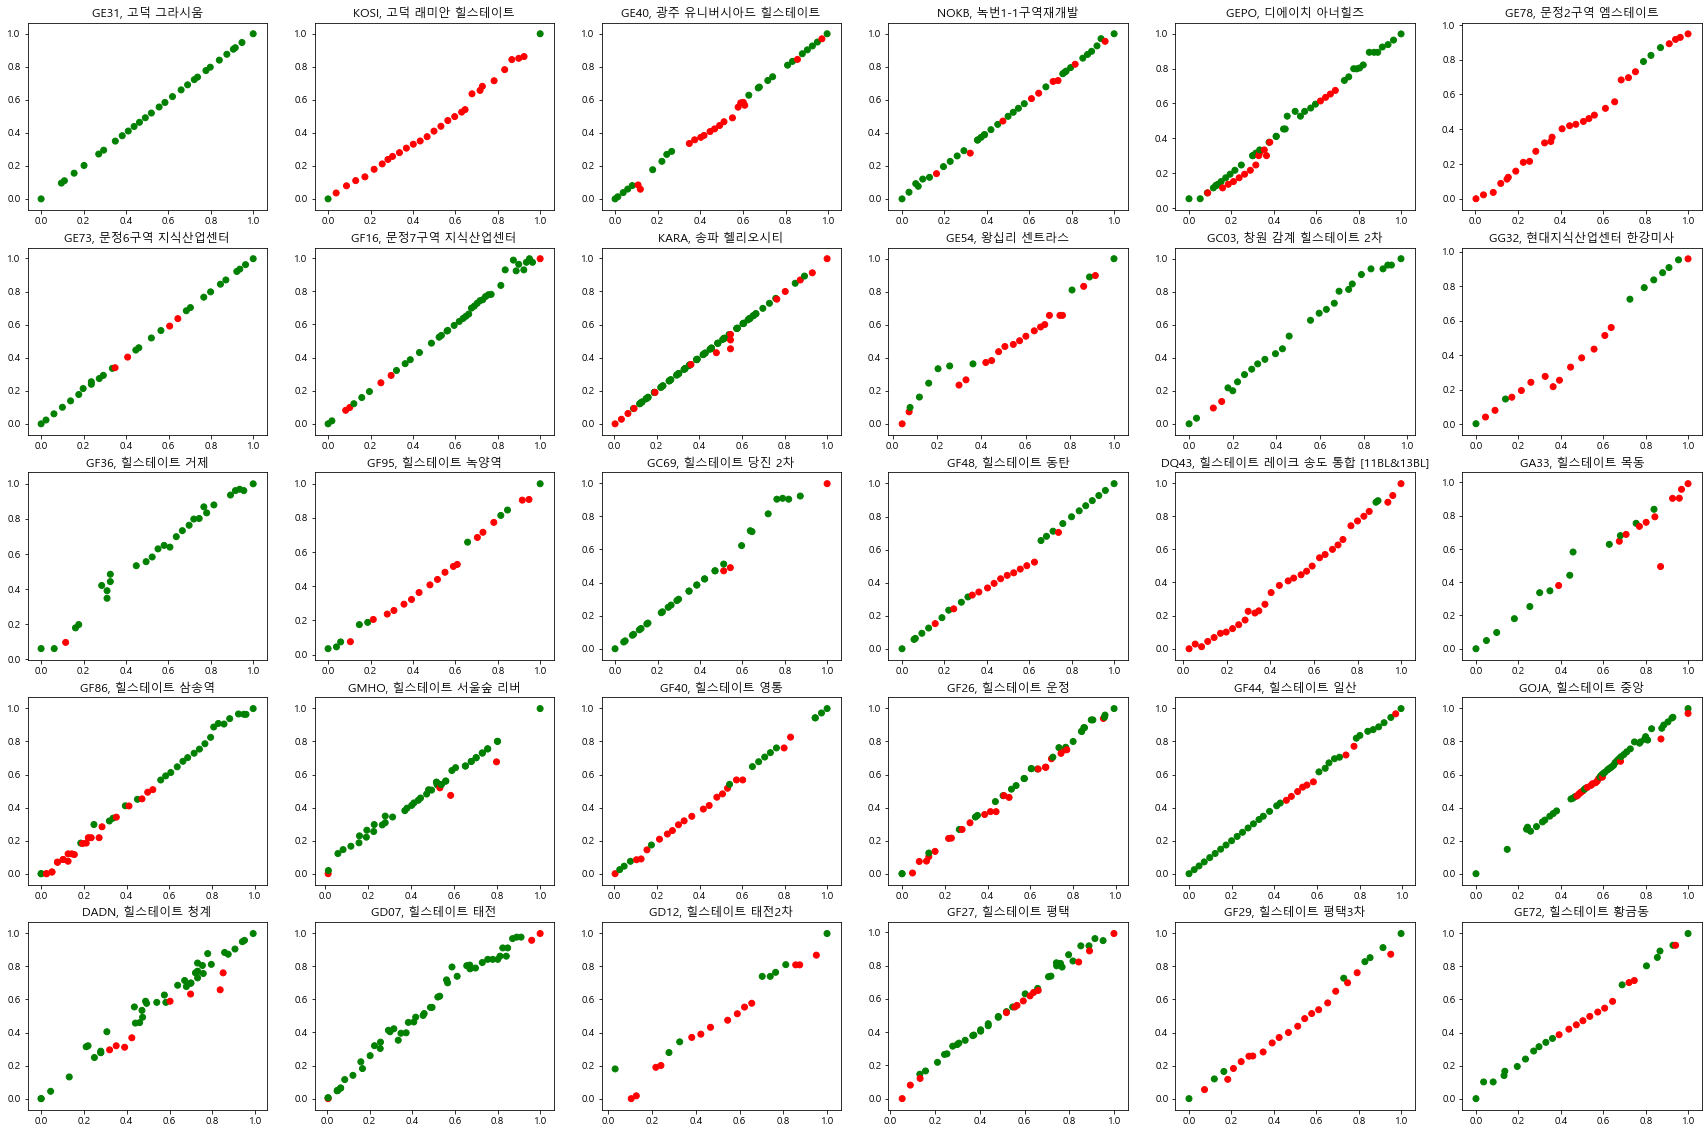

In [234]:
fig, ax = plt.subplots(figsize=(30,20))

for i,v in enumerate(df_milestone['현장코드'].unique()):


    plt.subplot(5,6,i+1)
    
    tmp = df_milestone[df_milestone['현장코드']==v]
    a = list(tmp['pct_plan']-tmp['pct_actual'])
    a = ['green' if x <= 0 else 'red' for x in a]
    plt.scatter(tmp['pct_plan'], tmp['pct_actual'], marker='o', color=a)
    plt.title(str(v)+', '+str(df[df['현장코드']==v]['현장명'].unique()[0]))

In [255]:
df_milestone['pct'] = df_milestone['pct'].apply(lambda x: round(x,2))

In [273]:
df_cluster = df_milestone.pivot(index='현장코드', columns='pct', values='diff')

In [274]:
df_cluster = df_cluster.T.fillna(method='ffill').T

In [271]:
df_cluster.fillna(0, inplace=True)

In [294]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(np.array(df_cluster))
df_result = pd.DataFrame(kmeans.labels_, index=df_cluster.index, columns=['cluster'])
df_result['cluster'].value_counts()

1    16
0    10
2     3
3     1
Name: cluster, dtype: int64

# 계획 & 실적 차이일 기준(기간)으로 Clustering 진행

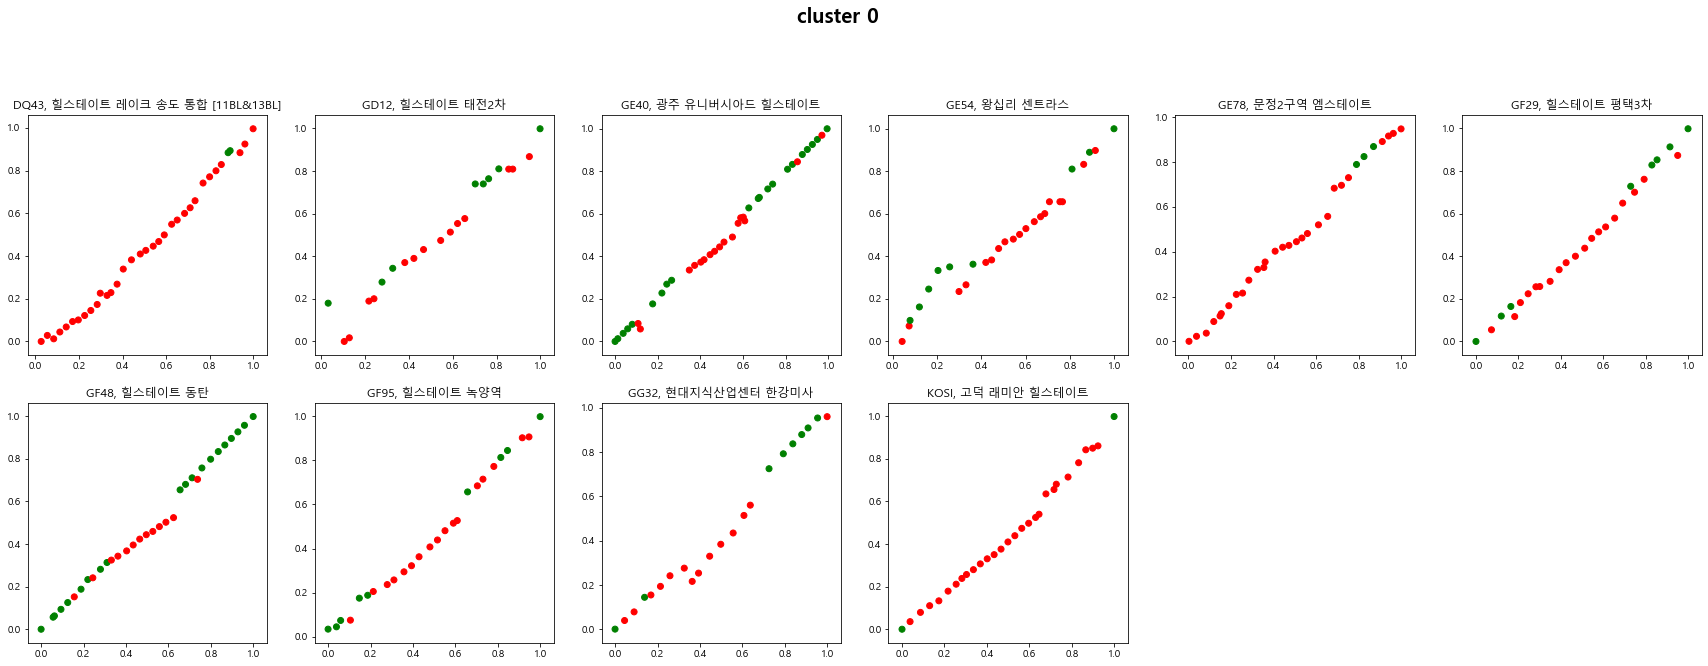

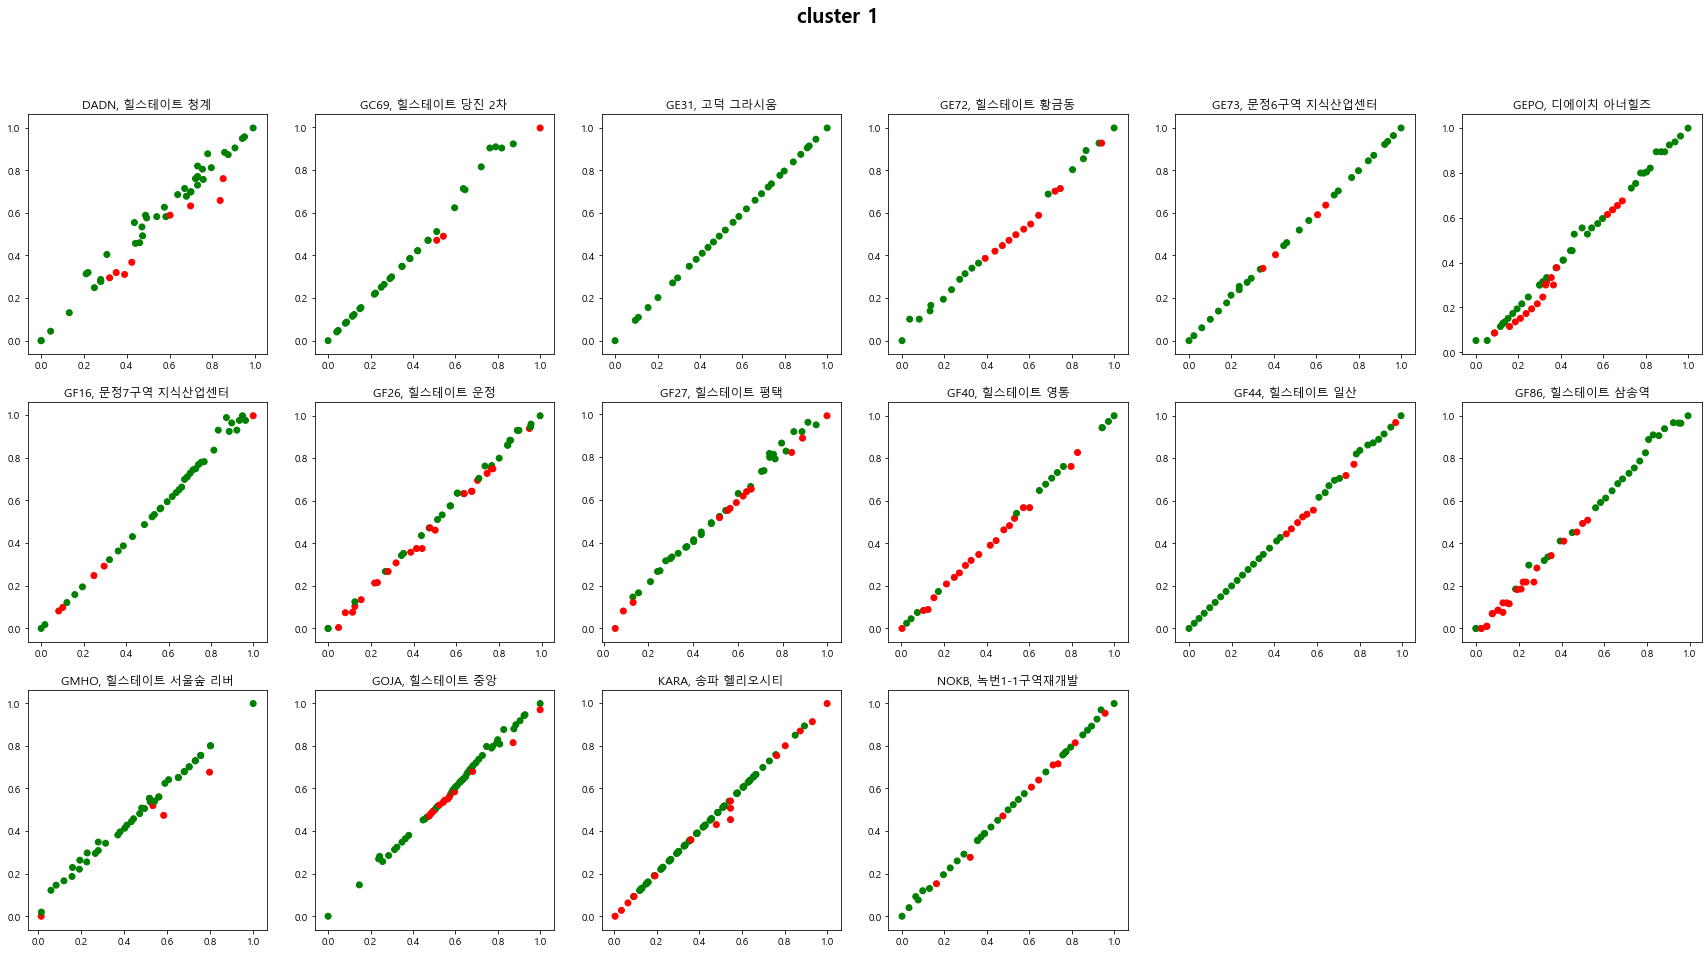

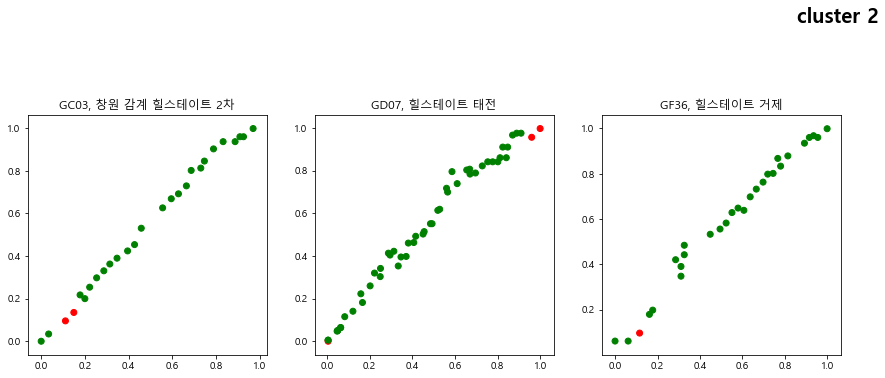

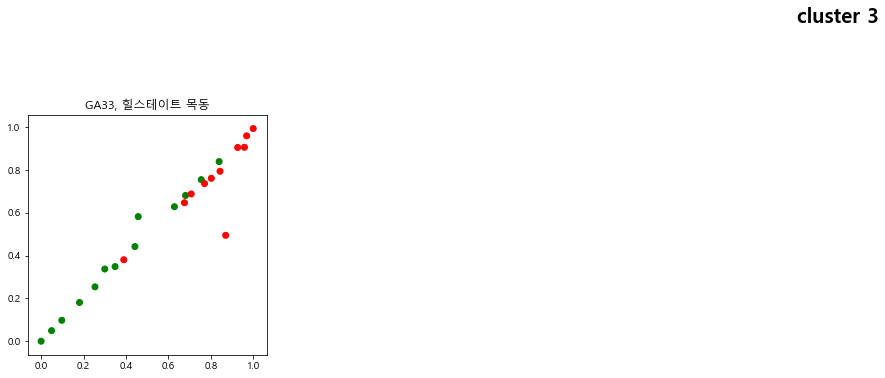

In [295]:
for cluster in [0,1,2,3]:
    w = 6
    l = round(df_result[df_result['cluster']==1].shape[0]/6)
    
    fig, ax = plt.subplots(figsize=(30,l*5))

    for i,v in enumerate(df_result[df_result['cluster']==cluster].index.tolist()):

        plt.subplot(l,w,i+1)

        tmp = df_milestone[df_milestone['현장코드']==v]
        a = list(tmp['pct_plan']-tmp['pct_actual'])
        a = ['green' if x <= 0 else 'red' for x in a]
        plt.scatter(tmp['pct_plan'], tmp['pct_actual'], marker='o', color=a)
        plt.title(str(v)+', '+str(df[df['현장코드']==v]['현장명'].unique()[0]))
    plt.suptitle('cluster '+str(cluster), fontsize=20, fontweight='bold')
    plt.show()

In [345]:
df_cluster = df_milestone.pivot(index='현장코드', columns='pct', values='diff')

In [346]:
df_cluster = df_cluster.T.fillna(method='ffill').T

In [347]:
df_cluster[df_cluster<0]=-1
df_cluster[df_cluster>0]=1

In [318]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(np.array(df_cluster))
df_result = pd.DataFrame(kmeans.labels_, index=df_cluster.index, columns=['cluster'])
df_result['cluster'].value_counts()

3    11
2     8
0     6
1     5
Name: cluster, dtype: int64

# 계획 & 실적 차이일 기준(초과/빠르게/중립)으로 Clustering 진행

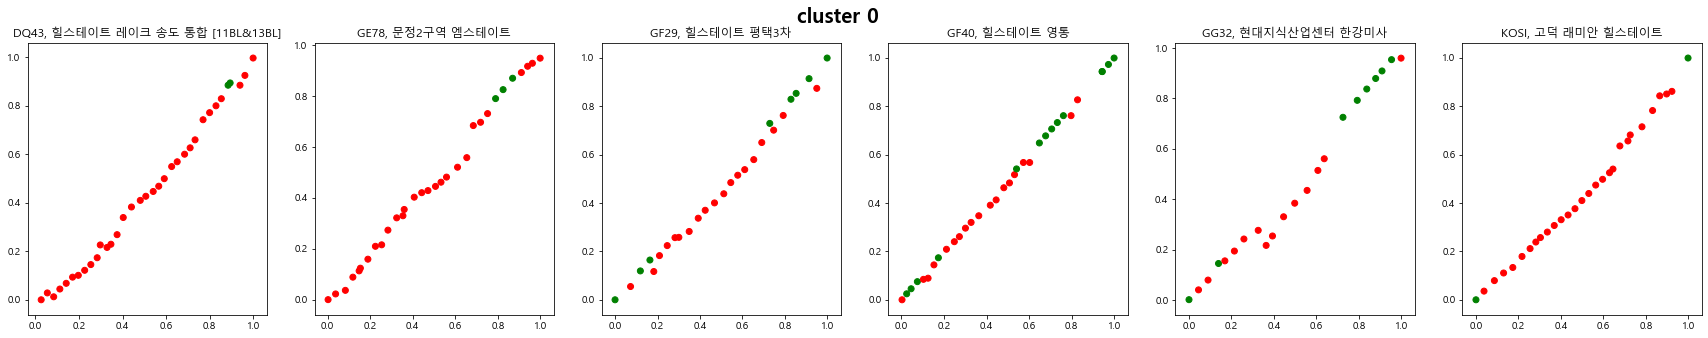

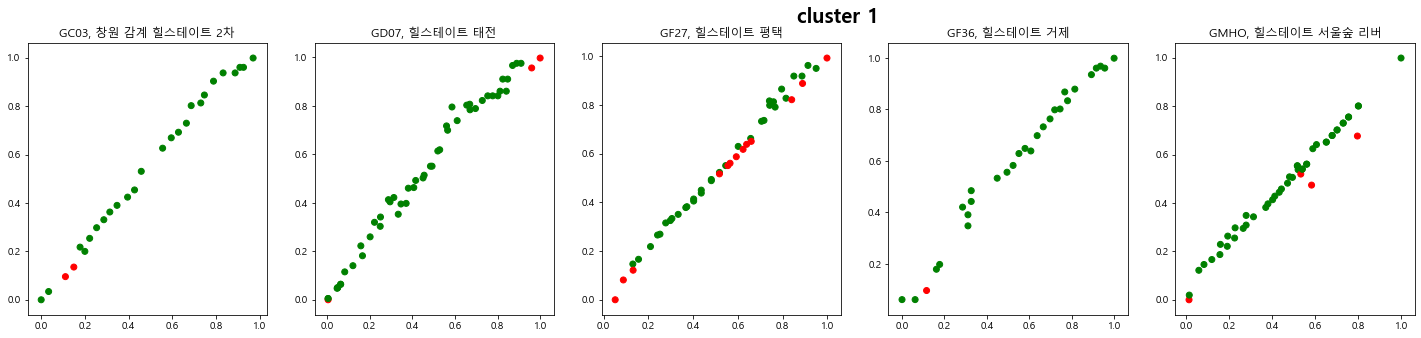

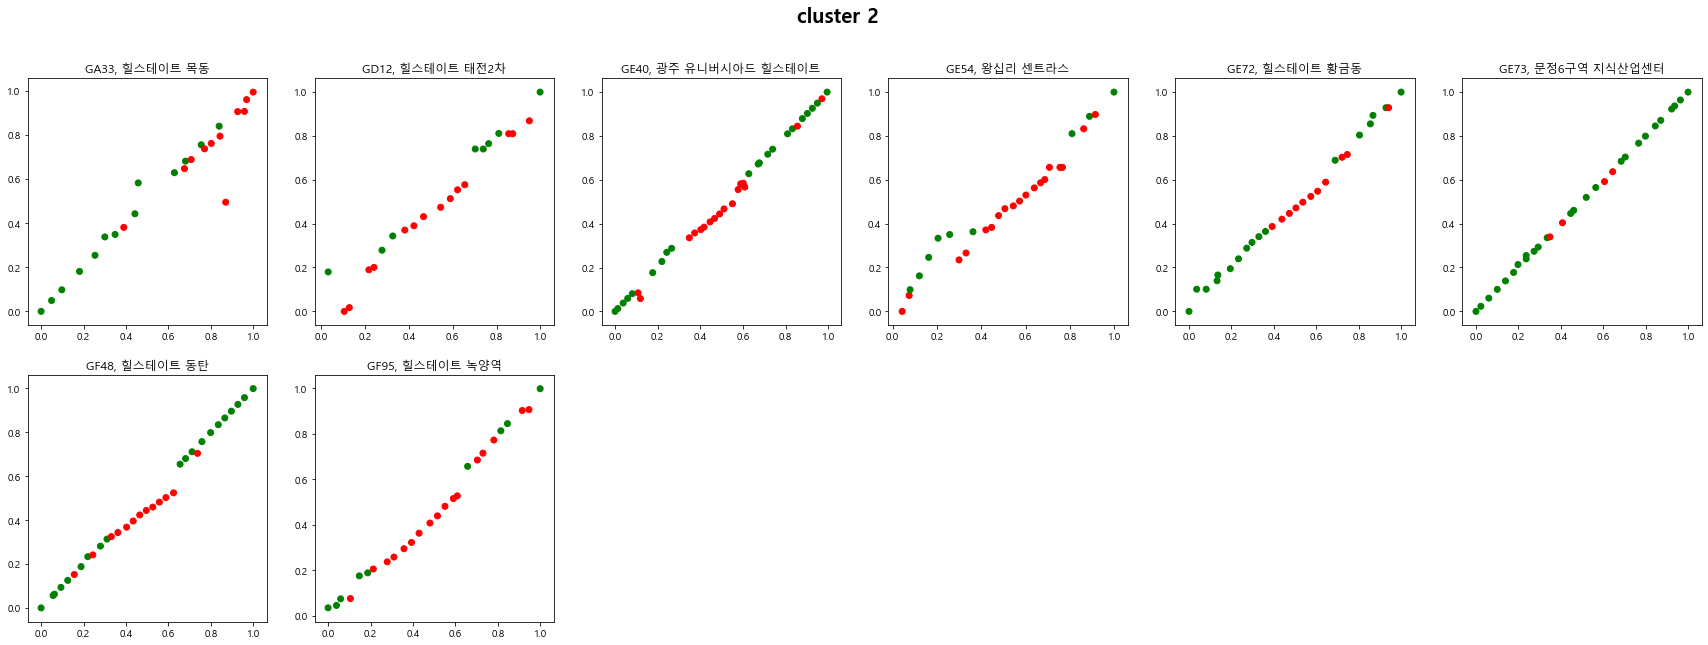

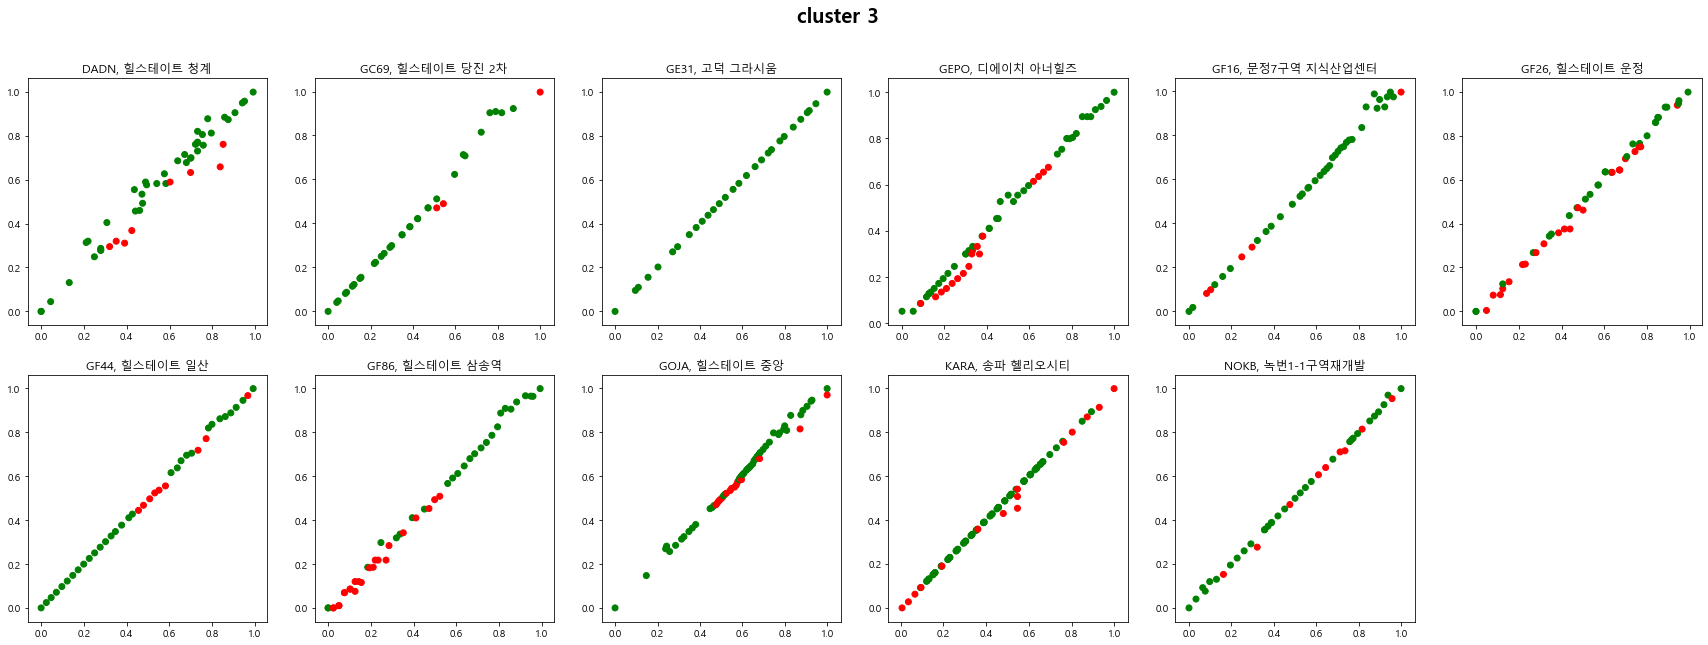

In [315]:
import math
for cluster in [0,1,2,3]:
    w = 6
    l = math.ceil(df_result[df_result['cluster']==cluster].shape[0]/6)
    
    fig, ax = plt.subplots(figsize=(30,l*5))

    for i,v in enumerate(df_result[df_result['cluster']==cluster].index.tolist()):

        plt.subplot(l,w,i+1)

        tmp = df_milestone[df_milestone['현장코드']==v]
        a = list(tmp['pct_plan']-tmp['pct_actual'])
        a = ['green' if x <= 0 else 'red' for x in a]
        plt.scatter(tmp['pct_plan'], tmp['pct_actual'], marker='o', color=a)
        plt.title(str(v)+', '+str(df[df['현장코드']==v]['현장명'].unique()[0]))
    plt.suptitle('cluster '+str(cluster), fontsize=20, fontweight='bold')
    plt.show()

In [415]:
df_cluster = df_milestone.pivot(index='현장코드', columns='pct', values='diff')
df_cluster = df_cluster.T.fillna(method='ffill').T
df_cluster[df_cluster<0]=-1
df_cluster[df_cluster>0]=1

In [422]:
df_cluster.loc[df_milestone[(df_milestone['diff']<-60)&(df_milestone['diff']>=-90)]['현장코드'].unique().tolist(),'3m_delay'] = 1
df_cluster.loc[df_milestone[(df_milestone['diff']<-30)&(df_milestone['diff']>=-60)]['현장코드'].unique().tolist(),'2m_delay'] = 1
df_cluster.loc[df_milestone[(df_milestone['diff']<0)&(df_milestone['diff']>=-30)]['현장코드'].unique().tolist(),'1m_delay'] = 1

In [418]:
for i,v in enumerate(df_cluster.index.tolist()):
    for j in range(10):
        a = df_cluster.iloc[i:,j*10:((j+1)*10)+1].values.tolist()[0]
        if -1 in a:
            df_cluster.loc[v,str((j+1)*10)+'%']=a.count(-1)

In [436]:
a = df_cluster.loc[:,'10%':'100%'].sum(axis=1)

In [438]:
for i in df_cluster.loc[:,'10%':'100%'].columns.tolist():
    df_cluster[i] = df_cluster[i]/a

In [440]:
df_cluster.fillna(0, inplace=True)

In [447]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(np.array(df_cluster))
df_result = pd.DataFrame(kmeans.labels_, index=df_cluster.index, columns=['cluster'])
df_result['cluster'].value_counts()

3    11
2     8
0     6
1     5
Name: cluster, dtype: int64

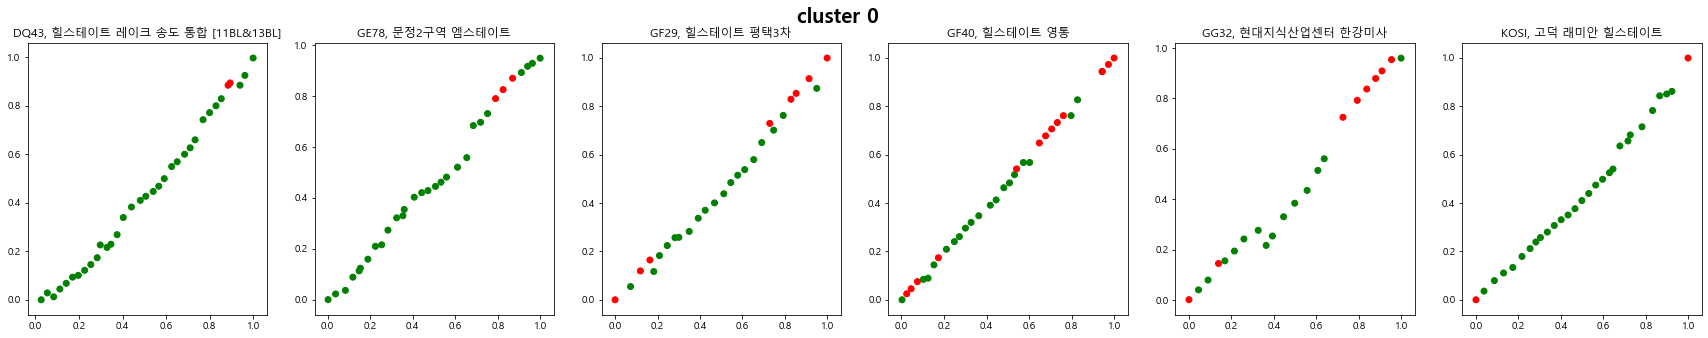

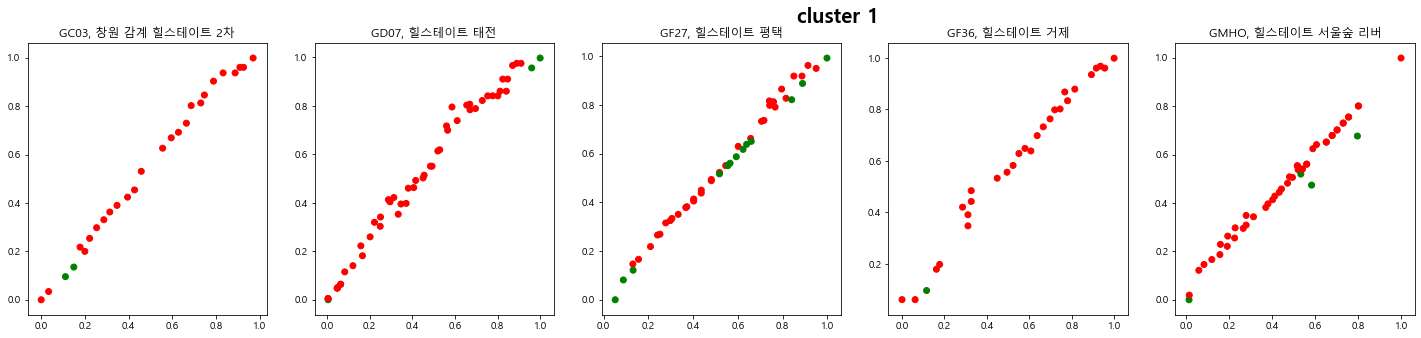

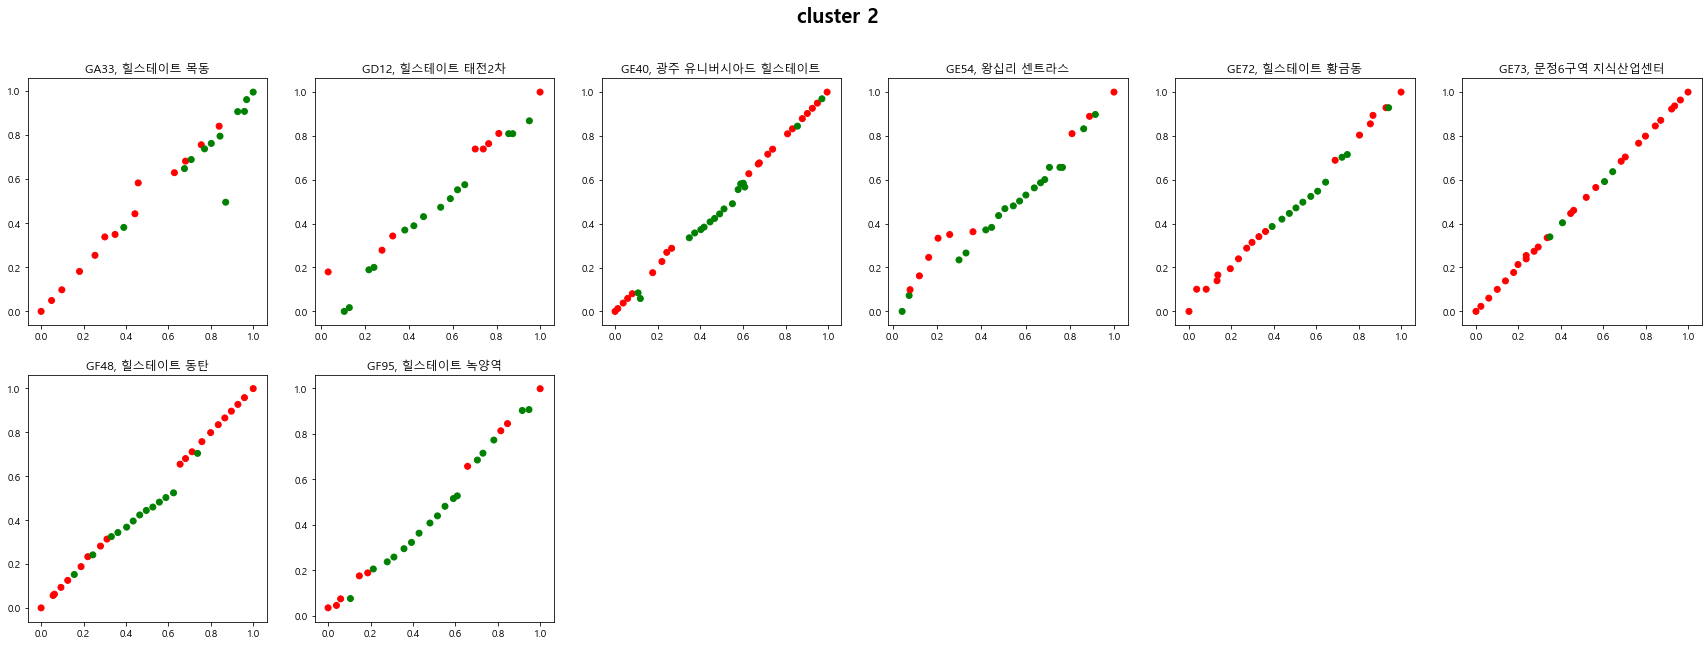

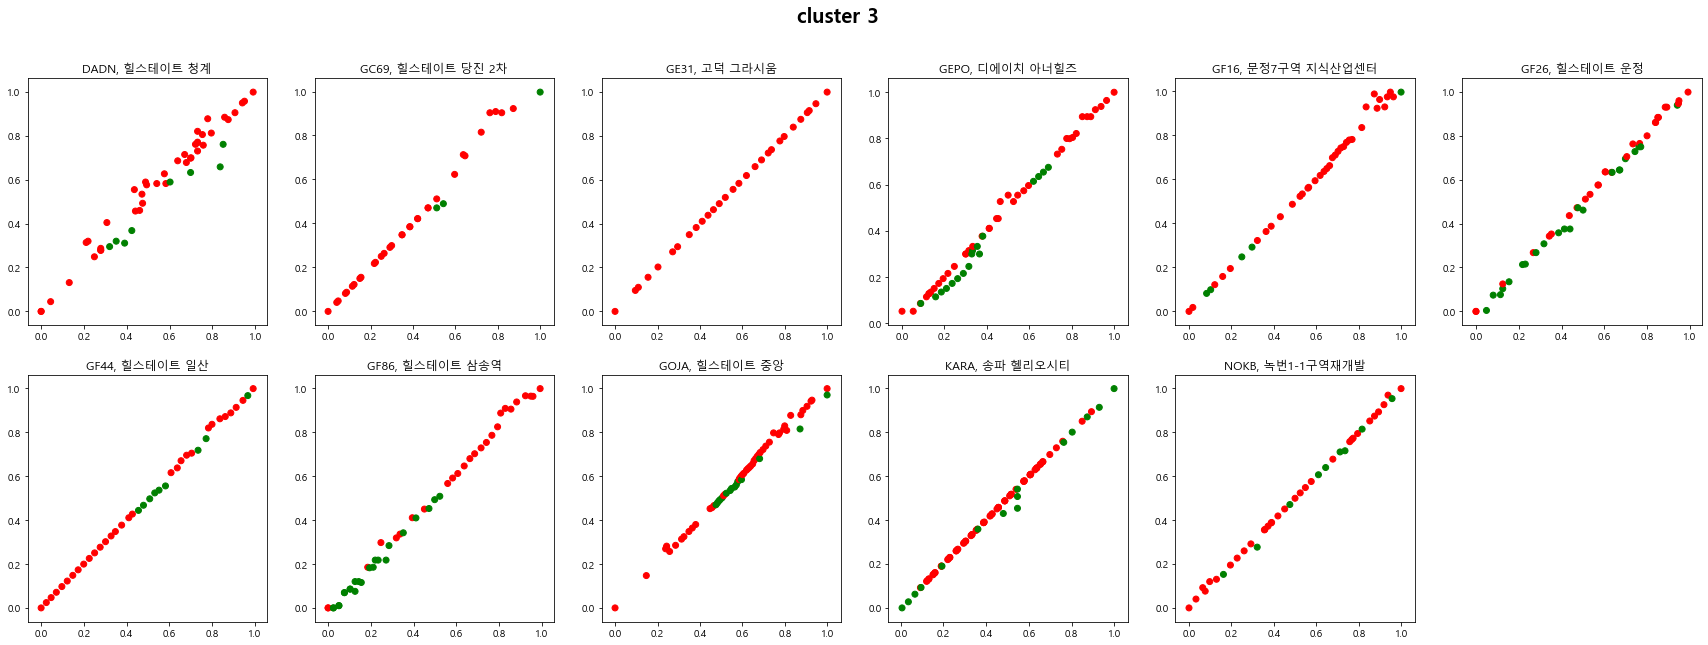

In [459]:
import math
for cluster in [0,1,2,3]:
    w = 6
    l = math.ceil(df_result[df_result['cluster']==cluster].shape[0]/6)
    
    fig, ax = plt.subplots(figsize=(30,l*5))

    for i,v in enumerate(df_result[df_result['cluster']==cluster].index.tolist()):

        plt.subplot(l,w,i+1)

        tmp = df_milestone[df_milestone['현장코드']==v]
        a = list(tmp['pct_plan']-tmp['pct_actual'])
        a = ['red' if x <= 0 else 'green' for x in a]
        plt.scatter(tmp['pct_plan'], tmp['pct_actual'], marker='o', color=a)
        plt.title(str(v)+', '+str(df[df['현장코드']==v]['현장명'].unique()[0]))
    plt.suptitle('cluster '+str(cluster), fontsize=20, fontweight='bold')
    plt.show()

In [453]:
df5 = pd.read_excel('공정보고_요청_데이터_주택.xlsx',sheet_name='현장마일스톤지연및만회대책보고')

In [457]:
df_result
for i in [0,1,2,3]:
    tmp = df_result[df_result['cluster']==i].index.tolist()
    df5[df5['현장코드'].isin(tmp)].to_csv('cluster_'+str(i)+'.csv', index=False, encoding='CP949')

In [463]:
tmp = df_result[df_result['cluster']==0].index.tolist()
a= df5[df5['현장코드'].isin(tmp)][['마일스톤고유번호','지연일','지연사유']].drop_duplicates(keep='first')
a.reset_index(drop=True, inplace=True)

In [481]:
df5[df5['현장코드'].isin(tmp)]

,현장코드,보고타입,보고기준일,마일스톤고유번호,지연일,지연구분,지연사유,지연대책
300,DQ43,W,2018-07-02,17844,-22,당사지연,골조공사 지연으로 인한 1차 기포·방통 지연(동절기),- 공정관리 철저 - 저층부 후속 공종 투입으로 전체공정에 영향 최소화
301,DQ43,M,2018-07-06,17844,-22,당사지연,골조공사 지연으로 인한 1차 기포·방통 지연(동절기),- 공정관리 철저- 저층부 후속 공종 투입으로 전체공정에 영향 최소화
302,DQ43,W,2018-07-09,17844,-22,당사지연,골조공사 지연으로 인한 1차 기포·방통 지연(동절기),- 공정관리 철저- 저층부 후속 공종 투입으로 전체공정에 영향 최소화
303,DQ43,W,2018-07-16,17844,-22,당사지연,골조공사 지연으로 인한 1차 기포·방통 지연(동절기),- 공정관리 철저- 저층부 후속 공종 투입으로 전체공정에 영향 최소화
304,DQ43,W,2018-07-23,17844,-22,당사지연,골조공사 지연으로 인한 1차 기포·방통 지연(동절기),- 공정관리 철저- 저층부 후속 공종 투입으로 전체공정에 영향 최소화
305,DQ43,W,2018-07-30,17844,-22,당사지연,골조공사 지연으로 인한 1차 기포·방통 지연(동절기),- 공정관리 철저- 저층부 후속 공종 투입으로 전체공정에 영향 최소화
6630,GG32,M,2017-12-06,20892,-1,불가항력,폭설로 인한 공정지연,-
6631,GG32,W,2017-12-18,20892,-1,불가항력,폭설로 인한 공정지연,-
6632,GG32,W,2017-12-25,20892,-1,불가항력,폭설로 인한 공정지연,-
6633,GG32,M,2018-03-06,20818,-4,불가항력,동절기 폭설과 예상치 못한 강우로 인한 공기지연,24일자로 바닥정리 완료


In [478]:
from konlpy.tag import Komoran, Kkma, Hannanum
#komoran = Komoran()
#kkma = Kkma()
hannanum = Hannanum()

In [508]:
df_words = pd.DataFrame([])
for j in [0,1,2,3]:
    tmp = df_result[df_result['cluster']==j].index.tolist()
    a= df5[df5['현장코드'].isin(tmp)][['마일스톤고유번호','지연일','지연사유']].drop_duplicates(keep='first')
    a.reset_index(drop=True, inplace=True)
    c = []
    for i in range(len(a)):
        b = [x for x in hannanum.nouns(a.iloc[i,2]) if len(x)>=2]
        c = c + b
    tmp = pd.DataFrame(c)
    tmp = pd.DataFrame(tmp[0].value_counts())
    tmp.columns = [str(j)]
    df_words = pd.merge(df_words,tmp,left_index=True, right_index=True, how='outer')

In [511]:
df_words.to_csv('cluster_words.csv', encoding='CP949')

In [512]:
df_word = pd.read_csv('cluster_words.csv', encoding='CP949')

In [515]:
df_word.dropna(how='all', inplace=True)

In [519]:
df_word = df_word.groupby(['word']).sum()

In [523]:
df_word['sum'] = df_word.sum(axis=1)

In [527]:
df_word.sort_values(by='sum', ascending=False)

,0,1,2,3,sum
word,,,,,
지연,2.0,1289.0,77.0,453.0,3642.0
골조공사,1.0,662.0,22.0,197.0,1764.0
공정지연,1.0,161.0,21.0,69.0,504.0
골조업체,0.0,190.0,0.0,35.0,450.0
우천,0.0,197.0,19.0,8.0,448.0
한파,0.0,133.0,3.0,61.0,394.0
토공작업,0.0,195.0,0.0,0.0,390.0
고용노동부,0.0,192.0,0.0,0.0,384.0
부도,0.0,190.0,0.0,0.0,380.0
